# 환경설정

In [1]:
import sklearn
sklearn.__version__
# 버전 업그레이드를 하려면 ...
# !pip install scikit-learn --user --upgrade  를 쥬피터 노트북에서 바로 해주면 된다

'1.2.2'

# 1. Linear Regression
### 공부 시간에 따른  시험 점수

In [2]:
import matplotlib.pyplot as plt
import pandas as pd    

In [3]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [4]:
dataset.head() # head() : dataset 의 상위 5개 데이터만 가져오는 함수

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [5]:
X = dataset.iloc[:, :-1].values  # 처음부터 마지막 컬럼 직전까지의 데이터(독립 변수)
y = dataset.iloc[:, -1].values   # 마지막 컬럼 데이터(종속 변수 - 결과)

In [6]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [7]:
from sklearn.linear_model import LinearRegression   # Class 가져와서...
reg = LinearRegression()   # 선형 회귀 모형의 객체를 생성
reg.fit(X, y)    # fit(tness) : 훈련시킨다는 함수 ---> 학습(모델 생성) 
# 위의 (X, y) 데이터를 넣어주고 fit에 의해서 학습을 시키겠다라는 의미!!  --> 그럼 아래처럼 모델이 만들어짐

LinearRegression()

In [8]:
y_pred = reg.predict(X)    # 학습한 LinearRegression객체에 의한... X 에 대한 예측 값
y_pred      # x = 0.5 시간 공부했을때 점수가 5.000, 1.2 시간 공부했을때 12.3139 점 나왔다는 의미!!

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

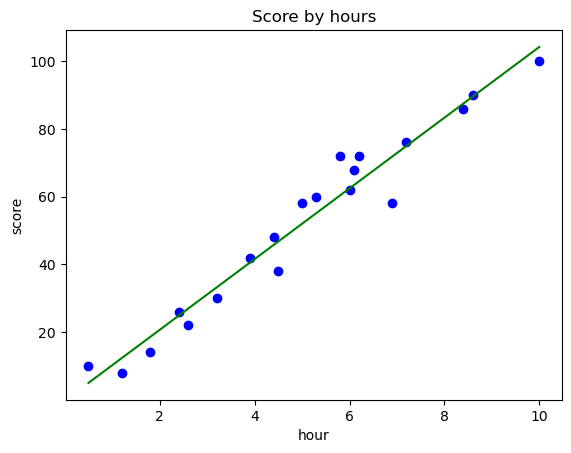

In [9]:
plt.scatter(X, y, color='blue')  # 산점도
plt.plot(X, y_pred, color='green')  # 선 그래프
plt.title('Score by hours')   # 제목
plt.xlabel('hour')  # X 축 이름
plt.ylabel('score')  # y 축 이름
plt.show()

In [10]:
print('9시간 공부했을 떄 예상 점수 :', reg.predict([[9], [8], [7]])) # X 값이 2차원 배열로 되어 있으므로 2차원 배열로 입력해줘야...

9시간 공부했을 떄 예상 점수 : [93.77478776 83.33109082 72.88739388]


In [11]:
reg.coef_  # 기울기 (m)

array([10.44369694])

In [12]:
reg.intercept_  # y 절편

-0.21848470286721522

#### y = mx + b -> y = 10.4436x - 0.2184

### 데이터 세트 분리

In [13]:
import matplotlib.pyplot as plt
import pandas as pd    

In [14]:
dataset = pd.read_csv('LinearRegressionData.csv')
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [15]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values 

In [16]:
 # 트레인세트(훈련세트)와 테스트 셋트로 분류  ->분류 위해 모듈 추가
from sklearn.model_selection import train_test_split  # train_test_split 라는 Class 가져와서...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  
# 객체 생성과 생성자(X, y)를 통해 튜플형식으로 반환 : test_size=0.2-> 훈련과 테스트셋을 8:2로 random_state=0 : 무작위 없이

In [17]:
X, len(X)  # 전체 데이터 X, 개수

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [18]:
X_train, len(X_train)  # 훈련 세트 X , 개수

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [19]:
X_test, len(X_test)  # 테스트 세트 X, 개수

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [20]:
y, len(y)   # 전체 데이터 y

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64),
 20)

In [21]:
y_train, len(y_train)   # 훈련 세트 y

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

In [22]:
y_test, len(y_test)   # 테스트 세트 y

(array([ 90,   8, 100,  38], dtype=int64), 4)

### 분리된 데이터를 통한 모델링

In [23]:
from sklearn.linear_model import LinearRegression   
reg = LinearRegression()  

In [24]:
reg.fit(X_train, y_train)  # 훈련 세트로 학습

LinearRegression()

### 데이터 시각화(훈련 세트)

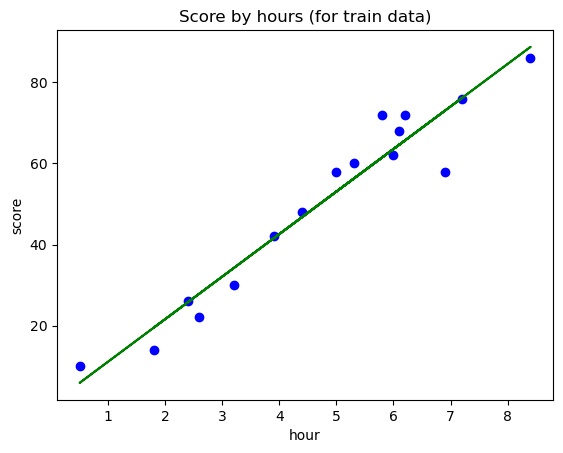

In [25]:
plt.scatter(X_train, y_train, color='blue')  # 산점도
plt.plot(X_train, reg.predict(X_train), color='green')  # 선 그래프
plt.title('Score by hours (for train data)')   # 제목
plt.xlabel('hour')  # X 축 이름
plt.ylabel('score')  # y 축 이름
plt.show()

### 데이터 시각화(테스트 세트)

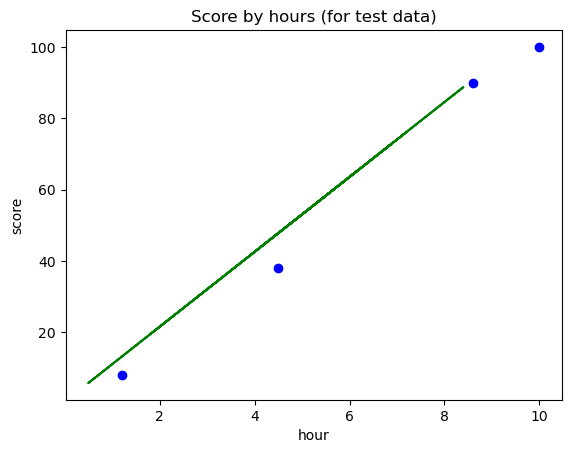

In [26]:
plt.scatter(X_test, y_test, color='blue')  # 산점도
plt.plot(X_train, reg.predict(X_train), color='green')  # 선 그래프
plt.title('Score by hours (for test data)')   # 제목
plt.xlabel('hour')  # X 축 이름
plt.ylabel('score')  # y 축 이름
plt.show()

In [27]:
reg.coef_

array([10.49161294])

In [28]:
reg.intercept_

0.6115562905169796

### 모델 평가

In [29]:
reg.score(X_test, y_test)  #테스트 세트를 통한 모델 평가  // 97.2762...점이라는 높은 점수!!

0.9727616474310156

In [30]:
reg.score(X_train, y_train)   #훈련 세트를 통한 모델 평가

0.9356663661221668

## 경사 하강법(Gradient Descent)

In [31]:
from sklearn.linear_model import SGDRegressor  # SGD : Stochastic Gradient Descent : 확률적 경사 하강법
sr = SGDRegressor()  # 객체 만들고...
sr.fit(X_train, y_train)   # 학습시키고 ...Enter 하면 학습한 객체 나옴

SGDRegressor()

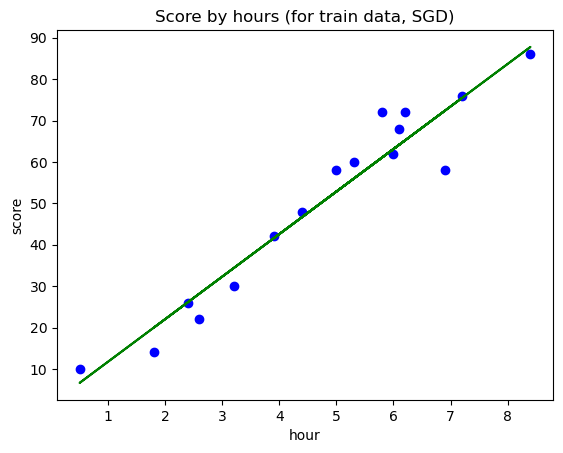

In [32]:
plt.scatter(X_train, y_train, color='blue')  # 산점도
plt.plot(X_train, sr.predict(X_train), color='green')  # 선 그래프
plt.title('Score by hours (for train data, SGD)')   # 제목
plt.xlabel('hour')  # X 축 이름
plt.ylabel('score')  # y 축 이름
plt.show()

In [33]:
sr.coef_, sr.intercept_

(array([10.26840079]), array([1.51425191]))

In [34]:
sr.score(X_test, y_test)  # 테스트 세트를 통한 모델 평가

0.9742719852581623

In [35]:
sr.score(X_train, y_train)  # 훈련 세트를 통한 모델 평가

0.9351978195803053

#### 생성자에 max_iter , eta0 를 넣은 확률적 경사 하강법
- max_iter : 훈련 세트 반복 횟수(Epoch 횟수)  
- eta0 : 학습율(learning rate)

In [43]:
from sklearn.linear_model import SGDRegressor  # SGD : Stochastic Gradient Descent : 확률적 경사 하강법
sr = SGDRegressor(max_iter=1000, eta0=0.01, random_state=0, verbose=1)  # 객체 만들고...
sr.fit(X_train, y_train)   # 학습시키고 ...Enter 하면 학습한 객체 나옴

-- Epoch 1
Norm: 9.29, NNZs: 1, Bias: 1.896809, T: 16, Avg. loss: 273.972341
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 10.22, NNZs: 1, Bias: 2.051952, T: 32, Avg. loss: 21.528918
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 10.29, NNZs: 1, Bias: 2.048223, T: 48, Avg. loss: 19.357188
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 10.18, NNZs: 1, Bias: 2.017074, T: 64, Avg. loss: 19.101267
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 10.04, NNZs: 1, Bias: 1.980206, T: 80, Avg. loss: 18.424713
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 10.19, NNZs: 1, Bias: 1.995352, T: 96, Avg. loss: 19.235589
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 10.33, NNZs: 1, Bias: 2.005374, T: 112, Avg. loss: 18.213245
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 10.19, NNZs: 1, Bias: 1.971733, T: 128, Avg. loss: 18.722017
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 10.08, NNZs: 1, Bias: 1.941770, T: 144, Avg. loss: 18.247385
Total training time: 0.0

SGDRegressor(random_state=0, verbose=1)

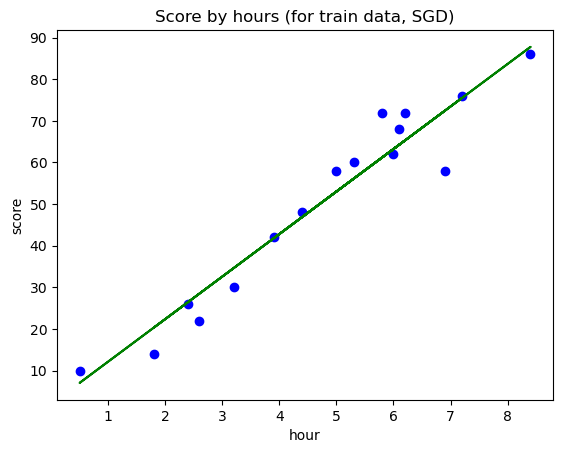

In [44]:
plt.scatter(X_train, y_train, color='blue')  # 산점도
plt.plot(X_train, sr.predict(X_train), color='green')  # 선 그래프
plt.title('Score by hours (for train data, SGD)')   # 제목
plt.xlabel('hour')  # X 축 이름
plt.ylabel('score')  # y 축 이름
plt.show()

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


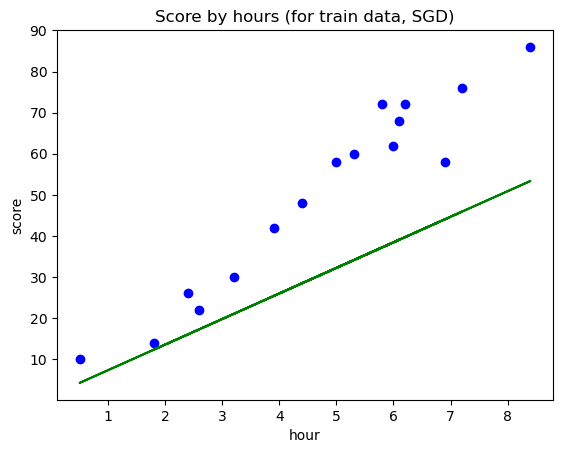

In [48]:
from sklearn.linear_model import SGDRegressor  # SGD : Stochastic Gradient Descent : 확률적 경사 하강법
sr = SGDRegressor(max_iter=100, eta0=0.0001, random_state=0)  # max_iter를 높일수록 정확도가 올라간다....
sr.fit(X_train, y_train)   # 학습시키고 ...Enter 하면 학습한 객체 나옴
plt.scatter(X_train, y_train, color='blue')  # 산점도
plt.plot(X_train, sr.predict(X_train), color='green')  # 선 그래프
plt.title('Score by hours (for train data, SGD)')   # 제목
plt.xlabel('hour')  # X 축 이름
plt.ylabel('score')  # y 축 이름
plt.show()

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


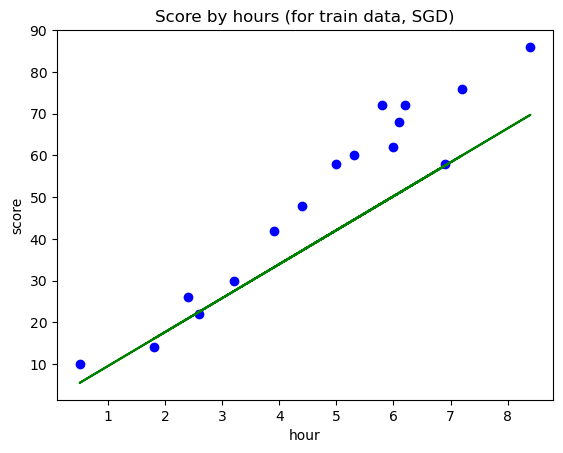

In [49]:
from sklearn.linear_model import SGDRegressor  # SGD : Stochastic Gradient Descent : 확률적 경사 하강법
sr = SGDRegressor(max_iter=200, eta0=0.0001, random_state=0)  # 객체 만들고...
sr.fit(X_train, y_train)   # 학습시키고 ...Enter 하면 학습한 객체 나옴
plt.scatter(X_train, y_train, color='blue')  # 산점도
plt.plot(X_train, sr.predict(X_train), color='green')  # 선 그래프
plt.title('Score by hours (for train data, SGD)')   # 제목
plt.xlabel('hour')  # X 축 이름
plt.ylabel('score')  # y 축 이름
plt.show()

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


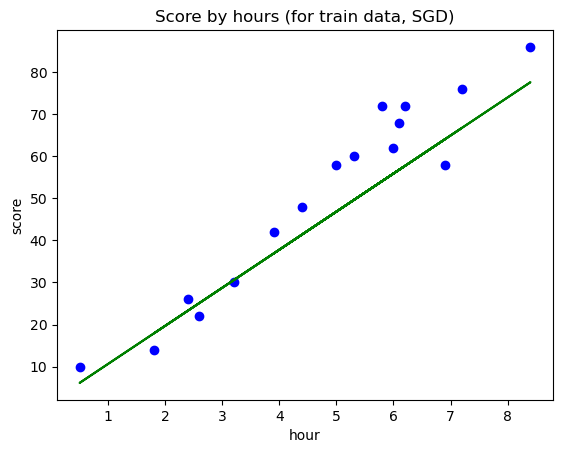

In [40]:
from sklearn.linear_model import SGDRegressor  # SGD : Stochastic Gradient Descent : 확률적 경사 하강법
sr = SGDRegressor(max_iter=300, eta0=0.0001, random_state=0)  # 객체 만들고...
sr.fit(X_train, y_train)   # 학습시키고 ...Enter 하면 학습한 객체 나옴
plt.scatter(X_train, y_train, color='blue')  # 산점도
plt.plot(X_train, sr.predict(X_train), color='green')  # 선 그래프
plt.title('Score by hours (for train data, SGD)')   # 제목
plt.xlabel('hour')  # X 축 이름
plt.ylabel('score')  # y 축 이름
plt.show()

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


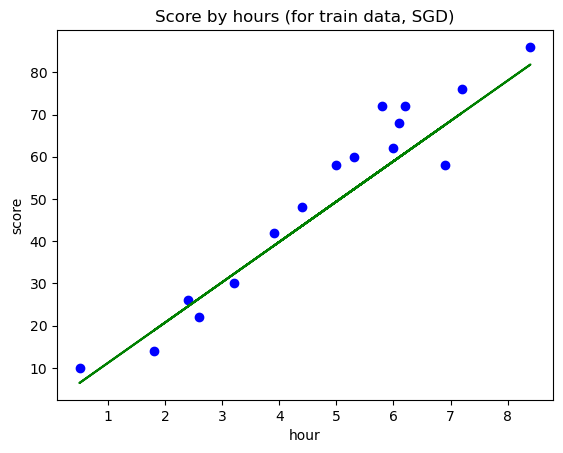

In [41]:
from sklearn.linear_model import SGDRegressor  # SGD : Stochastic Gradient Descent : 확률적 경사 하강법
sr = SGDRegressor(max_iter=400, eta0=0.0001, random_state=0)  # 객체 만들고...
sr.fit(X_train, y_train)   # 학습시키고 ...Enter 하면 학습한 객체 나옴
plt.scatter(X_train, y_train, color='blue')  # 산점도
plt.plot(X_train, sr.predict(X_train), color='green')  # 선 그래프
plt.title('Score by hours (for train data, SGD)')   # 제목
plt.xlabel('hour')  # X 축 이름
plt.ylabel('score')  # y 축 이름
plt.show()

[[ 0.5]
 [ 1.2]
 [ 1.8]
 [ 2.4]
 [ 2.6]
 [ 3.2]
 [ 3.9]
 [ 4.4]
 [ 4.5]
 [ 5. ]
 [ 5.3]
 [ 5.8]
 [ 6. ]
 [ 6.1]
 [ 6.2]
 [ 6.9]
 [ 7.2]
 [ 8.4]
 [ 8.6]
 [10. ]] [ 10   8  14  26  22  30  42  48  38  58  60  72  62  68  72  58  76  86
  90 100]


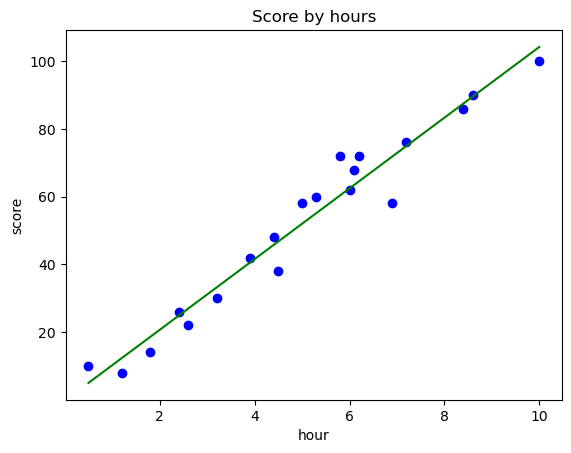

9시간 공부했을 떄 예상 점수 : [93.77478776 83.33109082 72.88739388]
[10.44369694]
-0.21848470286721522


In [42]:
import matplotlib.pyplot as plt
import pandas as pd   
dataset = pd.read_csv('LinearRegressionData.csv')
dataset.head() # head() : dataset 의 상위 5개 데이터만 가져오는 함수
X = dataset.iloc[:, :-1].values  # 처음부터 마지막 컬럼 직전까지의 데이터(독립 변수)
y = dataset.iloc[:, -1].values   # 마지막 컬럼 데이터(종속 변수 - 결과)
print(X, y)

from sklearn.linear_model import LinearRegression   # Class 가져와서...
reg = LinearRegression()   # 선형 회귀 모형의 객체를 생성
reg.fit(X, y)    # fit(tness) : 훈련시킨다는 함수 ---> 학습(모델 생성) 
# 위의 (X, y) 데이터를 넣어주고 fit에 의해서 학습을 시키겠다라는 의미!!  --> 그럼 아래처럼 모델이 만들어짐
y_pred = reg.predict(X)    # 학습한 LinearRegression객체에 의한... X 에 대한 예측 값
y_pred      # x = 0.5 시간 공부했을때 점수가 5.000, 1.2 시간 공부했을때 12.3139 점 나왔다는 의미!!
plt.scatter(X, y, color='blue')  # 산점도
plt.plot(X, y_pred, color='green')  # 선 그래프
plt.title('Score by hours')   # 제목
plt.xlabel('hour')  # X 축 이름
plt.ylabel('score')  # y 축 이름
plt.show()
print('9시간 공부했을 떄 예상 점수 :', reg.predict([[9], [8], [7]])) # X 값이 2차원 배열로 되어 있으므로 2차원 배열로 입력해줘야...
print(reg.coef_)  # 기울기 (m)
print(reg.intercept_)  # y 절편
   # 데이터 세트 분리
    
    